In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings


%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(file_path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [3]:
Z = df[["CPU_frequency", "Screen_Size_inch", "Weight_pounds", "Price"]]
print(Z.head())

   CPU_frequency  Screen_Size_inch  Weight_pounds  Price
0       0.551724              14.0        3.52800    978
1       0.689655              15.6        4.85100    634
2       0.931034              15.6        4.85100    946
3       0.551724              13.3        2.69010   1244
4       0.620690              15.6        4.21155    837


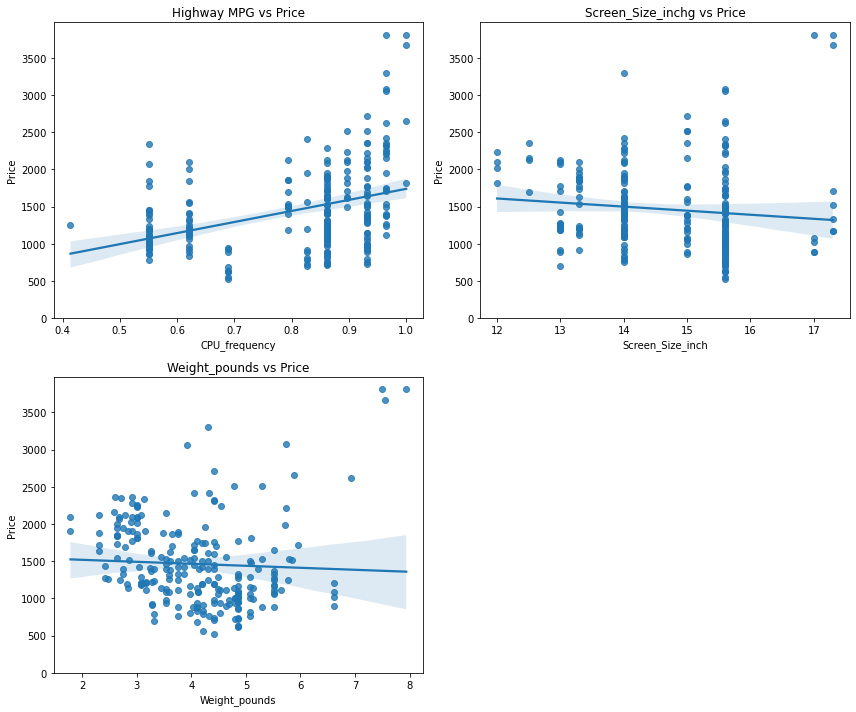

In [4]:
#  Regression plots
width = 12
height = 10
plt.figure(figsize=(width, height))

# Subplot 1: Highway MPG vs Price
plt.subplot(2, 2, 1)
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
plt.title("Highway MPG vs Price")

# Subplot 2: Screen_Size_inch vs Price
plt.subplot(2, 2, 2)
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
plt.title("Screen_Size_inchg vs Price")

# Subplot 3: Weight_pounds vs Price
plt.subplot(2, 2, 3)
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
plt.title("Weight_pounds vs Price")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display plot
plt.show()

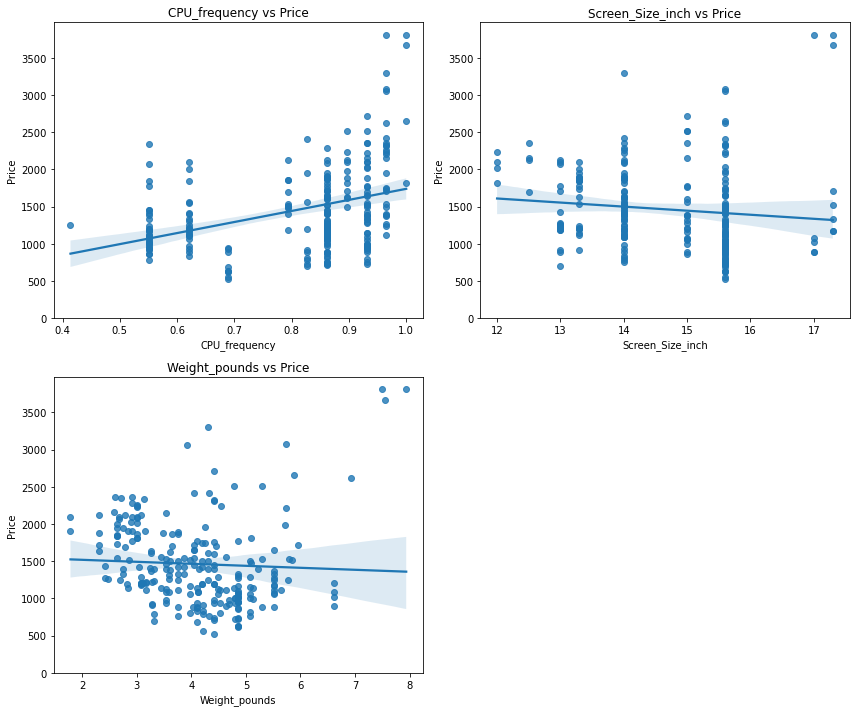

In [5]:
# Define the list of variables to plot against 'Price'
# Assuming 'Price' is the dependent variable
variables = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]

# Set up the figure with a specified size
plt.figure(figsize=(12, 10))

# Loop through the variables to create a subplot for each one
# Start enumeration at 1 for subplot indexing
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Arrange plots in 2 rows and 2 columns
    sns.regplot(x=var, y="Price", data=df)
    plt.ylim(0,)  # Set the lower y-limit to 0
    plt.title(f'{var} vs Price')

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# Show the complete figure with all subplots
plt.show()

In [6]:
# variables = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]

for param in variables:
    print(f"Correlation of Price and {param} is", df[[param, "Price"]].corr() )

Correlation of Price and CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


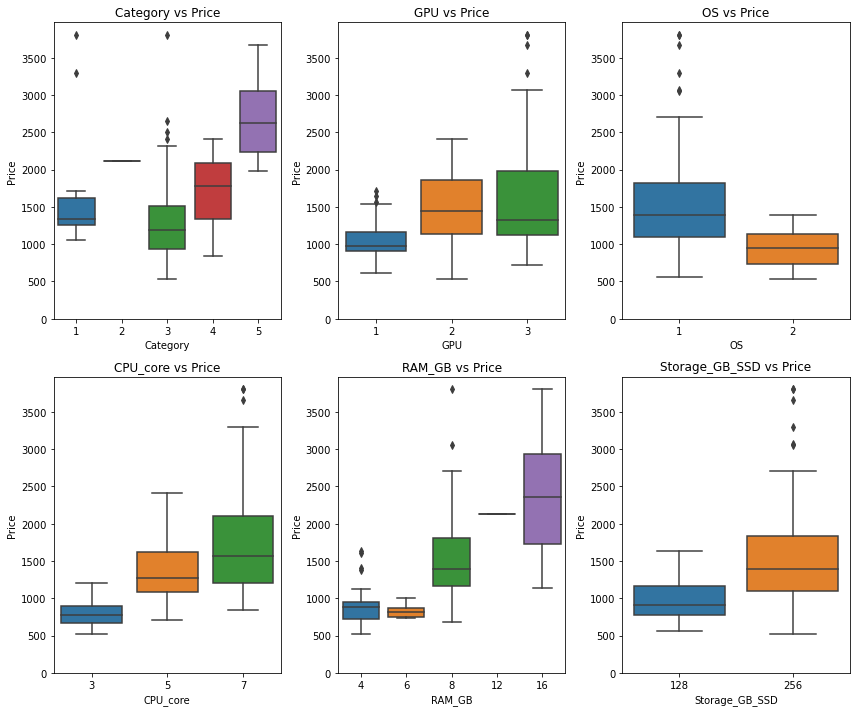

In [12]:
height = 10
width = 12
variables = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]

plt.figure(figsize= (width, height))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=var, y="Price", data= df)
    plt.title(f'{var} vs Price')
    plt.ylim(0,)

plt.tight_layout()
plt.show()

In [13]:
df.describe(include= "all")

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [16]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [18]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [20]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

#### Task 3 - GroupBy and Pivot Tables
Group the parameters "GPU", "CPU_core" and "Price" to make a Pivot table and visualize this connection using the pcolor plot.

In [21]:
df_group = df[["GPU", "CPU_core","Price"]]
grouped = df_group.groupby(["GPU", "CPU_core"], as_index=False).mean()
print(grouped)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [22]:
grouped_pivot = grouped.pivot(index= "GPU", columns= "CPU_core")
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


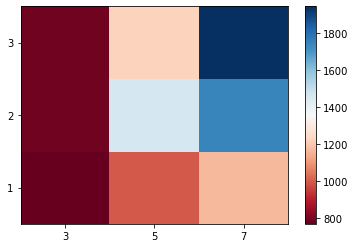

In [23]:
# Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [26]:
variables4 = df[['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_inch', 'Weight_pounds', 'CPU_core', 'OS', 'GPU', 'Category'] ]

for param in variables4:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    
    #print(param)
    print("The Pearson Correlation Coefficient for ", param," is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288438424e-20
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507147195e-09
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191727792
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118269  with a P-value of P = 0.08853397846832801
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.4397693853434994
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127011088e-14
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559248033
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  with a P-value of P = 6.166949698365852e-06
The Pearson Correlation Coefficient for 